## Tasks
### 1.)

In [15]:
import random
random.seed(33) # set seed

def generate_random_dna_sequence(length=400): # function for generating dna sequence, default length is 400 nucleotides
    nucleotides = ['A', 'C', 'T', 'G']
    return ''.join(random.choice(nucleotides) for _ in range(length))

random_dna = generate_random_dna_sequence() # test function with example sequence
print(random_dna)

CCTGCTGGTATGTGAGTTCAATTCATATCTTATTGGCAATAACAATAAGTTCCGGGTGTGAAGGGTACAGTCGGAATGTGGTGGGAGTTCACTTCTGGTTAACGATAACCCAAAGTACGAACGAACCATTAGTAAAGTTTCTATGGGTCACCTACGCCGGGTCAAAACTCTTCTAGGGTTCATCGATAACGTCGACCCGAGCCGTTGTGCGGGGATGCTCAACCGTGCGCCACGCAGAGGAAGGCTCGTGCGTATCGTATTCTGACTGTTACAGTCTTTTATACCATAGTTAGTTTCAAGATGTATGTCGCTCCGTTTTTTATCAGTCCGCGCCTCGCGAACCTTTGTCTCAAAACCGAGCAGGATAGACCCGTTTCCCCCATCCAACCGGGATTGTAAC


### 2.)

In [4]:
def edit_distance(seq1, seq2): # function for calculating edit distance between 2 strings (in this case dna sequences)
    m, n = len(seq1), len(seq2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                cost = 0
            else:
                cost = 1
            
            dp[i][j] = min(dp[i - 1][j] + 1,
                           dp[i][j - 1] + 1,
                           dp[i - 1][j - 1] + cost)
    
    return dp[m][n]

sequence1 = "ACGTAG"
sequence2 = "AGTACG"
distance = edit_distance(sequence1, sequence2) # test to confirm true result
print(f"Edit distance between '{sequence1}' and '{sequence2}': {distance}")

Edit distance between 'ACGTAG' and 'AGTACG': 2


### 3.)

In [16]:
dna_sequences = [generate_random_dna_sequence() for _ in range(20)] # generate 20 random dna sequences
distances = [] # create empty array to fill with the edit distances 
for i in range(len(dna_sequences)): # iterate through the 20 sequences to calculate the distance between each pair of sequences
    for j in range(i + 1, len(dna_sequences)):
        distance = edit_distance(dna_sequences[i], dna_sequences[j])
        distances.append(distance) # append the array with the distance

### 4.)

Average Edit Distance: 212.82


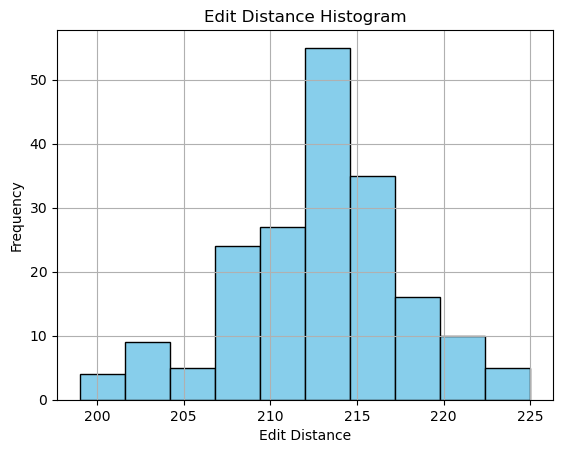

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(distances, bins=10, color='skyblue', edgecolor='black') # plot histogram of distances between the 20 randomly generated dna sequences
plt.xlabel('Edit Distance')
plt.ylabel('Frequency')
plt.title('Edit Distance Histogram')
plt.grid(True)

average_distance = np.mean(distances) # calculate average distance between any two of the given sequences
print(f"Average Edit Distance: {average_distance:.2f}")

## Real Life Data:
### 1-3.)

In [12]:
from Bio import Entrez, SeqIO

Entrez.email = "lamir@ucdavis.edu" # required by entrez package from the biopython library

# accession #s representing the various species that are parsed from the fasta files within the biopython library
accession_numbers = ['AF011222', 'AF254446', 'X90314', 'AF089820', 'AF176766', 'AF451972', 'AF451964', 'AY079510', 'AF050738', 'AF176722', 'AF315498', 'AF176731']

sequences = [] # empty array to store the dna sequences
for acc in accession_numbers: # parse the files to store the corresponding dna sequences 
    handle = Entrez.efetch(db="nucleotide", id=acc, rettype="fasta", retmode="text")
    record = SeqIO.read(handle, "fasta")
    sequences.append(record)

### 4.)

Average Edit Distance: 122.53


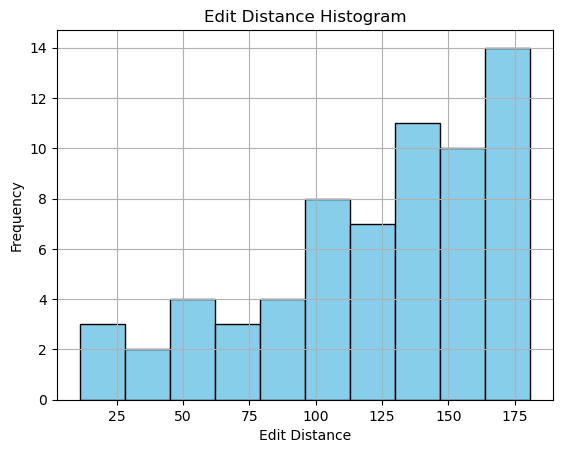

In [18]:
real_distances = [] # empty array to store edit distances between the real dna sequences

for i in range(len(sequences)): # similar to before, iterate through the list of sequences and calculate each pair's edit distance to store in the array
    for j in range(i + 1, len(sequences)):
        distance = edit_distance(sequences[i], sequences[j])
        real_distances.append(distance)
        

plt.hist(real_distances, bins=10, color='skyblue', edgecolor='black') # plot a histogram of the distribution of edit distances in the real data
plt.xlabel('Edit Distance')
plt.ylabel('Frequency')
plt.title('Edit Distance Histogram')
plt.grid(True)

average_distance = np.mean(real_distances) # calculate the average edit distance found within the selected species' dna sequences
print(f"Average Edit Distance: {average_distance:.2f}")

### 5.) 
Analysis written in PDF report.